In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Populating the interactive namespace from numpy and matplotlib


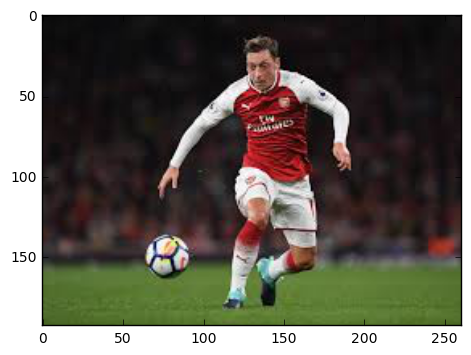

In [2]:
from keras.preprocessing.image import load_img
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Football.jpg')
imgplot = plt.imshow(img)
plt.show()
# load an image from file
image = load_img('Football.jpg', target_size=(224, 224))

In [3]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [4]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [5]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [6]:
# predict the probability across all output classes
yhat = model.predict(image)

In [7]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = (label[0][0],label[0][1])
# print the classification
print('Prediction : %s (%.2f%%) \nIt can also be : %s (%.2f%%)' % (label[0][1], label[0][2]*100,label[1][1], label[1][2]*100))

Prediction : soccer_ball (96.47%) 
It can also be : rugby_ball (3.20%)
